In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import *
import tensorflow as tf

from sklearn.model_selection import train_test_split
import numpy as np

## Load data

In [2]:
dataset, info = tfds.load(
    "deep_weeds",
    with_info=True
)

In [3]:
info

tfds.core.DatasetInfo(
    name='deep_weeds',
    full_name='deep_weeds/3.0.0',
    description="""
    The DeepWeeds dataset consists of 17,509 images capturing eight different weed species native to Australia in situ with neighbouring flora.The selected weed species are local to pastoral grasslands across the state of Queensland.The images were collected from weed infestations at the following sites across Queensland: "Black River", "Charters Towers",  "Cluden", "Douglas", "Hervey Range", "Kelso", "McKinlay" and "Paluma".
    """,
    homepage='https://github.com/AlexOlsen/DeepWeeds',
    data_path='dataset/deep_weeds/3.0.0',
    file_format=tfrecord,
    download_size=469.32 MiB,
    dataset_size=469.99 MiB,
    features=FeaturesDict({
        'image': Image(shape=(256, 256, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=9),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_exam

In [4]:
info.features['label'].names

['Chinee apple',
 'Lantana',
 'Parkinsonia',
 'Parthenium',
 'Prickly acacia',
 'Rubber vine',
 'Siam weed',
 'Snake weed',
 'Negative']

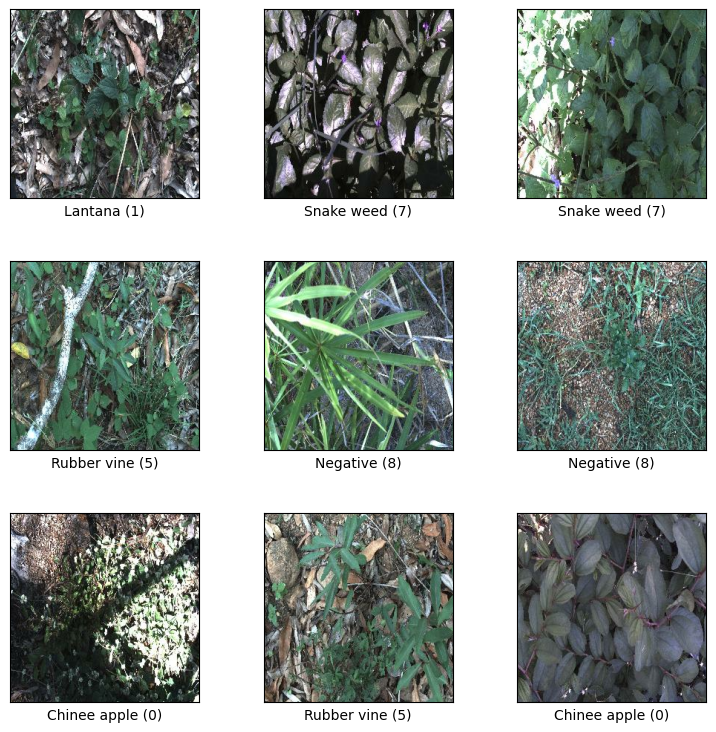

In [5]:
fig = tfds.show_examples(dataset, info)

## Image processing

In [6]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (64, 64))
    return image

In [7]:
images = []
labels = []
for i in dataset:
    images.append(preprocess(i['image'].numpy()))
    labels.append(i['label'].numpy())

images = np.array(images)
labels = np.array(labels).astype('uint32')

In [8]:
images.shape, labels.shape

((17509, 64, 64, 3), (17509,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15758, 64, 64, 3), (1751, 64, 64, 3), (15758,), (1751,))

## Build model

In [10]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(info.features['label'].num_classes, activation='softmax')
])

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
493/493 [==============================] - 10s 9ms/step - loss: 1.4330 - accuracy: 0.5354 - val_loss: 1.2775 - val_accuracy: 0.5774
Epoch 2/10
493/493 [==============================] - 4s 8ms/step - loss: 1.1987 - accuracy: 0.5728 - val_loss: 1.1232 - val_accuracy: 0.5968
Epoch 3/10
493/493 [==============================] - 4s 9ms/step - loss: 1.0824 - accuracy: 0.6100 - val_loss: 1.1413 - val_accuracy: 0.5945
Epoch 4/10
493/493 [==============================] - 4s 8ms/step - loss: 0.9668 - accuracy: 0.6482 - val_loss: 0.9959 - val_accuracy: 0.6459
Epoch 5/10
493/493 [==============================] - 4s 7ms/step - loss: 0.8630 - accuracy: 0.6896 - val_loss: 0.9388 - val_accuracy: 0.6688
Epoch 6/10
493/493 [==============================] - 5s 10ms/step - loss: 0.7517 - accuracy: 0.7255 - val_loss: 0.9705 - val_accuracy: 0.6773
Epoch 7/10
493/493 [==============================] - 5s 11ms/step - loss: 0.6539 - accuracy: 0.7651 - val_loss: 0.9166 - val_accuracy: 0.6882
Epo

In [13]:
model.save("models/deep_weeds.h5")